In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

# 1. Load data

In [14]:
def GBdataLoad(data_dir, phase = 'train'):
    for i in os.listdir(data_dir):
        if 'good' in i and phase in i:
            G_train_X = np.load(os.path.join(data_dir, i))
        elif 'bad' in i and phase in i:
            B_train_X = np.load(os.path.join(data_dir, i))
            
    def add_ch(img):
        """
        (sample #, height, width,) -> (sample #, height, width, channel)
        """
        return np.expand_dims(img, axis = -1)

    return add_ch(G_train_X), add_ch(B_train_X)

def input_for_Pytorch(img):
    """
    (sample #, height, width, channel) -> (sample #, channel, height, width)
    """
    img = np.transpose(img, (0, 3, 1, 2))
    return img

def CreateLabel(data, cls):
    label = cls*np.ones([data.shape[0]])
    return label

def Convert(G_test_X, B_test_X):
    G_test_X = input_for_Pytorch(G_test_X)
    B_test_X = input_for_Pytorch(B_test_X)
    G_test_Y, B_test_Y = CreateLabel(G_test_X, 0), CreateLabel(B_test_X, 1)
    print("GOOD:",G_test_X.shape, G_test_Y.shape, "BAD:", B_test_X.shape, B_test_Y.shape)
    GB_test_X, GB_test_Y = np.vstack([G_test_X, B_test_X]), np.hstack([G_test_Y, B_test_Y])
    print("Total:", GB_test_X.shape, GB_test_Y.shape, '\n')
    return GB_test_X, GB_test_Y

## 1.1. Die_Fixture

### 1.1.1. Training data

In [15]:
AE_dir = '/mnt/disk2/data/private_data/SSM/2_Mockup/1_AE_Accel_Data/1_Die_Fixture/AE'
Accel_dir = '/mnt/disk2/data/private_data/SSM/2_Mockup/1_AE_Accel_Data/1_Die_Fixture/Acceleration'
        
AE_G_train_X, AE_B_train_X = GBdataLoad(AE_dir, phase = 'train')
AE_GB_train_X, AE_GB_train_Y = Convert(AE_G_train_X, AE_B_train_X)

Accel_G_train_X, Accel_B_train_X = GBdataLoad(Accel_dir, phase = 'train')
Accel_GB_train_X, Accel_GB_train_Y = Convert(Accel_G_train_X, Accel_B_train_X)

A2_G_train_X = np.concatenate((AE_G_train_X, Accel_G_train_X), axis = -1)
A2_B_train_X = np.concatenate((AE_B_train_X, Accel_B_train_X), axis = -1)
A2_GB_train_X, A2_GB_train_Y = Convert(A2_G_train_X, A2_B_train_X)

GOOD: (2822, 1, 40, 40) (2822,) BAD: (2510, 1, 40, 40) (2510,)
Total: (5332, 1, 40, 40) (5332,) 

GOOD: (2822, 1, 40, 40) (2822,) BAD: (2510, 1, 40, 40) (2510,)
Total: (5332, 1, 40, 40) (5332,) 

GOOD: (2822, 2, 40, 40) (2822,) BAD: (2510, 2, 40, 40) (2510,)
Total: (5332, 2, 40, 40) (5332,) 



### 1.1.2. Testing data

In [16]:
AE_G_test_X, AE_B_test_X = GBdataLoad(AE_dir, phase = 'test')
AE_GB_test_X, AE_GB_test_Y = Convert(AE_G_test_X, AE_B_test_X)

Accel_G_test_X, Accel_B_test_X = GBdataLoad(Accel_dir, phase = 'test')
Accel_GB_test_X, Accel_GB_test_Y = Convert(Accel_G_test_X, Accel_B_test_X)

A2_G_test_X = np.concatenate((AE_G_test_X, Accel_G_test_X), axis = -1)
A2_B_test_X = np.concatenate((AE_B_test_X, Accel_B_test_X), axis = -1)
A2_GB_test_X, A2_GB_test_Y = Convert(A2_G_test_X, A2_B_test_X)

GOOD: (1261, 1, 40, 40) (1261,) BAD: (1311, 1, 40, 40) (1311,)
Total: (2572, 1, 40, 40) (2572,) 

GOOD: (1261, 1, 40, 40) (1261,) BAD: (1311, 1, 40, 40) (1311,)
Total: (2572, 1, 40, 40) (2572,) 

GOOD: (1261, 2, 40, 40) (1261,) BAD: (1311, 2, 40, 40) (1311,)
Total: (2572, 2, 40, 40) (2572,) 



## 1.2. Noise

In [17]:
def GBdataLoad2(data_dir, phase = 'train', data = 'AE'):
    for i in os.listdir(data_dir):
        if 'good' in i and phase in i and data in i:
            G_train_X = np.load(os.path.join(data_dir, i))
        elif 'bad' in i and phase in i and data in i:
            B_train_X = np.load(os.path.join(data_dir, i))
            
    def add_ch(img):
        """
        (sample #, height, width,) -> (sample #, height, width, channel)
        """
        return np.expand_dims(img, axis = -1)

    return add_ch(G_train_X), add_ch(B_train_X)

### 1.2.1. Training data

In [19]:
Data_dir = '/mnt/disk2/data/private_data/SSM/2_Mockup/1_AE_Accel_Data/2_NOISE'
        
AE_N_G_train_X, AE_N_B_train_X = GBdataLoad2(Data_dir, phase = 'train', data = 'AE')
AE_N_GB_train_X, AE_N_GB_train_Y = Convert(AE_N_G_train_X, AE_N_B_train_X)

Accel_N_G_train_X, Accel_N_B_train_X = GBdataLoad2(Data_dir, phase = 'train', data = 'accel')
Accel_N_GB_train_X, Accel_N_GB_train_Y = Convert(Accel_N_G_train_X, Accel_N_B_train_X)

A2_N_G_train_X = np.concatenate((AE_N_G_train_X, Accel_N_G_train_X), axis = -1)
A2_N_B_train_X = np.concatenate((AE_N_B_train_X, Accel_N_B_train_X), axis = -1)
A2_N_GB_train_X, A2_N_GB_train_Y = Convert(A2_N_G_train_X, A2_N_B_train_X)

GOOD: (1559, 1, 40, 40) (1559,) BAD: (1674, 1, 40, 40) (1674,)
Total: (3233, 1, 40, 40) (3233,) 

GOOD: (1559, 1, 40, 40) (1559,) BAD: (1674, 1, 40, 40) (1674,)
Total: (3233, 1, 40, 40) (3233,) 

GOOD: (1559, 2, 40, 40) (1559,) BAD: (1674, 2, 40, 40) (1674,)
Total: (3233, 2, 40, 40) (3233,) 



### 1.2.2. Testing data

In [20]:
AE_N_G_test_X, AE_N_B_test_X = GBdataLoad2(Data_dir, phase = 'test', data = 'AE')
AE_N_GB_test_X, AE_N_GB_test_Y = Convert(AE_N_G_test_X, AE_N_B_test_X)

Accel_N_G_test_X, Accel_N_B_test_X = GBdataLoad2(Data_dir, phase = 'test', data = 'accel')
Accel_N_GB_test_X, Accel_N_GB_test_Y = Convert(Accel_N_G_test_X, Accel_N_B_test_X)

A2_N_G_test_X = np.concatenate((AE_N_G_test_X, Accel_N_G_test_X), axis = -1)
A2_N_B_test_X = np.concatenate((AE_N_B_test_X, Accel_N_B_test_X), axis = -1)
A2_N_GB_test_X, A2_N_GB_test_Y = Convert(A2_N_G_test_X, A2_N_B_test_X)

GOOD: (698, 1, 40, 40) (698,) BAD: (697, 1, 40, 40) (697,)
Total: (1395, 1, 40, 40) (1395,) 

GOOD: (698, 1, 40, 40) (698,) BAD: (697, 1, 40, 40) (697,)
Total: (1395, 1, 40, 40) (1395,) 

GOOD: (698, 2, 40, 40) (698,) BAD: (697, 2, 40, 40) (697,)
Total: (1395, 2, 40, 40) (1395,) 



# 2. Plot WT images

In [21]:
def PlotWTs(test_X, test_Y, class_name, cls_num = 0):

    idx = np.random.choice(np.where(test_Y == cls_num)[0])

    plt.figure(figsize = (10, 5))
    plt.suptitle('idx: {} / pred: {}'.format(idx, class_name[int(test_Y[idx])]))
    plt.subplot(121)
    plt.title('Acoustic Emission Data')
    plt.imshow(test_X[idx, 0, :, :])
    plt.axis('off')
    plt.subplot(122)
    plt.title('Accelerometer Data')
    plt.imshow(test_X[idx, 1, :, :])
    plt.axis('off')
    plt.show()

## 2.1. Die_Fixture

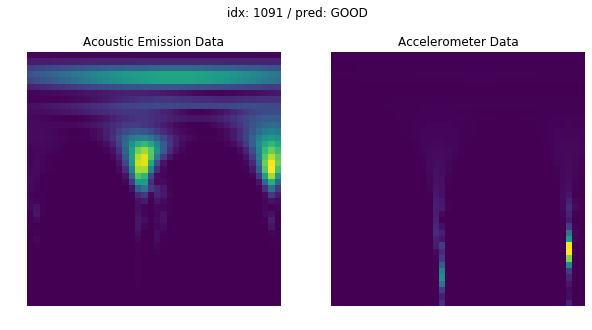

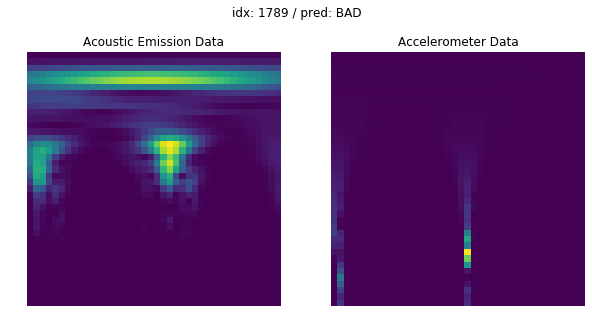

In [22]:
class_name = ['GOOD', 'BAD']

for i in range(len(class_name)):
    PlotWTs(A2_GB_test_X, A2_GB_test_Y, class_name, cls_num = i)

## 2.2. Noise

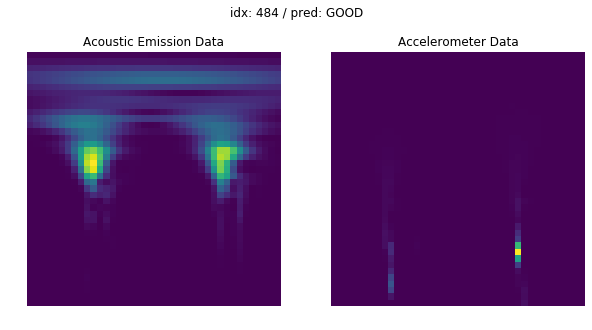

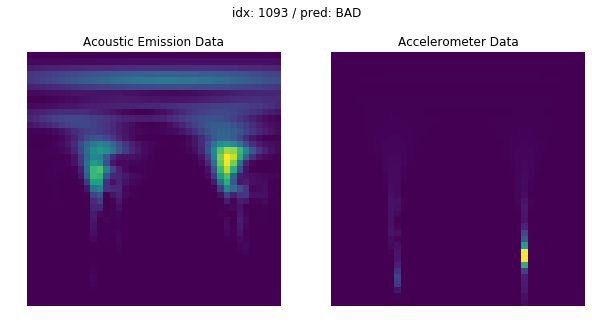

In [25]:
for i in range(len(class_name)):
    PlotWTs(A2_N_GB_test_X, A2_N_GB_test_Y, class_name, cls_num = i)